<a href="https://colab.research.google.com/github/sardarmoneeb/Machine-Learning/blob/main/Fake_and_Real_Reviews_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# {"username":"sardarsab","key":"aeb0ef366b1da2f879943031be60e93f"}

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Optional – if you want to save models or results to Drive


Mounted at /content/drive


In [ ]:
!pip install opendatasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset'
target_path = '/content/drive/MyDrive/fake-reviews-dataset'

od.download(dataset_url, data_dir=target_path)

Skipping, found downloaded files in "/content/drive/MyDrive/fake-reviews-dataset/fake-reviews-dataset" (use force=True to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/fake-reviews-dataset/fake-reviews-dataset/"


'fake reviews dataset.csv'


In [31]:
import pandas as pd

# Mount drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/fake-reviews-dataset/fake-reviews-dataset/fake reviews dataset.csv')

# Show first few rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [32]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
df.columns


Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# -----------------------------
# 1. Text Cleaning Function
# -----------------------------
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', ' ', text)
    # Remove special characters, numbers, punctuation
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# -----------------------------
# 2. Preprocessing Function (Clean + Remove Stopwords + Lemmatize)
# -----------------------------
def preprocess_text(text):
    text = clean_text(text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)

# -----------------------------
# 3. Apply Preprocessing
# -----------------------------
print("Starting preprocessing...")
df['cleaned_text'] = df['text_'].apply(preprocess_text)

# Drop rows where cleaned_text is empty
df = df[df['cleaned_text'].str.strip() != ''].reset_index(drop=True)

print(f"After preprocessing: {len(df)} reviews remain")
print("\nSample cleaned reviews:")
print(df[['text_', 'cleaned_text']].head(3))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Starting preprocessing...
After preprocessing: 40431 reviews remain

Sample cleaned reviews:
                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   

                                    cleaned_text  
0  love well made sturdy comfortable love pretty  
1   love great upgrade original mine couple year  
2        pillow saved back love look feel pillow  


In [36]:
# After your preprocessing cell
print(df[['text_', 'cleaned_text', 'label']].head())
print("\nLabel distribution:")
print(df['label'].value_counts())

                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                    cleaned_text label  
0  love well made sturdy comfortable love pretty    CG  
1   love great upgrade original mine couple year    CG  
2        pillow saved back love look feel pillow    CG  
3    missing information use great product price    CG  
4            nice set good quality set two month    CG  

Label distribution:
label
OR    20216
CG    20215
Name: count, dtype: int64


In [37]:
# Map CG → 1 (fake), OR → 0 (real)
df['target'] = df['label'].map({'CG': 1, 'OR': 0})
y = df['target']

In [38]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Train: 32344, Test: 8087


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10_000,      # keep top 10 k terms
    ngram_range=(1, 2),       # unigrams + bigrams
    min_df=2,                 # ignore very rare words
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

print(f"TF-IDF shape → {X_train_tfidf.shape}")

TF-IDF shape → (32344, 10000)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
def evaluate(model, name):
    model.fit(X_train_tfidf, y_train)
    pred = model.predict(X_test_tfidf)
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred, target_names=['Real (OR)', 'Fake (CG)']))

In [42]:
# -------------------------------------------------
# Train and Save Models Using evaluate()
# -------------------------------------------------

# 1️⃣ Logistic Regression
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
evaluate(model_lr, 'Logistic Regression')

# 2️⃣ Naive Bayes
model_nb = MultinomialNB()
evaluate(model_nb, 'Multinomial Naive Bayes')

# 3️⃣ Linear SVM
model_svm = LinearSVC(class_weight='balanced', max_iter=2000)
evaluate(model_svm, 'Linear SVM')

print("✅ All models trained, evaluated, and saved successfully!")



=== Logistic Regression ===
Accuracy : 0.8848769630270805
              precision    recall  f1-score   support

   Real (OR)       0.88      0.89      0.89      4044
   Fake (CG)       0.89      0.88      0.88      4043

    accuracy                           0.88      8087
   macro avg       0.89      0.88      0.88      8087
weighted avg       0.89      0.88      0.88      8087


=== Multinomial Naive Bayes ===
Accuracy : 0.8659577099047855
              precision    recall  f1-score   support

   Real (OR)       0.86      0.88      0.87      4044
   Fake (CG)       0.87      0.86      0.86      4043

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087


=== Linear SVM ===
Accuracy : 0.8883393100037097
              precision    recall  f1-score   support

   Real (OR)       0.89      0.89      0.89      4044
   Fake (CG)       0.89      0.89      0.89      4043

    accura

In [43]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/joebeachcapital/recipe-reviews-and-user-feedback-dataset'
target_path = '/content/drive/MyDrive/recipe-reviews-and-user-feedback-dataset'

od.download(dataset_url, data_dir=target_path)

Skipping, found downloaded files in "/content/drive/MyDrive/recipe-reviews-and-user-feedback-dataset/recipe-reviews-and-user-feedback-dataset" (use force=True to force download)


In [44]:
!ls "/content/drive/MyDrive/recipe-reviews-and-user-feedback-dataset/recipe-reviews-and-user-feedback-dataset/"


'Recipe Reviews and User Feedback Dataset.csv'


In [45]:
df.columns


Index(['category', 'rating', 'label', 'text_', 'cleaned_text', 'target'], dtype='object')

In [46]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 1]
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
import pandas as pd

# Load dataset from Google Drive
recipe_path = '/content/drive/MyDrive/recipe-reviews-and-user-feedback-dataset/recipe-reviews-and-user-feedback-dataset/Recipe Reviews and User Feedback Dataset.csv'

recipe_df = pd.read_csv(recipe_path)

# Check basic info
print("Shape:", recipe_df.shape)
print("Columns:", recipe_df.columns)
recipe_df.head()


Shape: (18182, 15)
Columns: Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text'],
      dtype='object')


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [48]:
# Drop nulls before cleaning
recipe_df = recipe_df.dropna(subset=['text']).copy()

# Apply cleaning
recipe_df['cleaned_text'] = recipe_df['text'].apply(clean_text)

# Drop empty results (if any)
recipe_df = recipe_df[recipe_df['cleaned_text'].str.strip() != '']

print("After cleaning:", recipe_df.shape)
recipe_df[['text','cleaned_text']].head()


After cleaning: (18164, 16)


,text,cleaned_text
0,"I tweaked it a little, removed onions because ...",tweaked little removed onions onion haters hou...
1,Bush used to have a white chili bean and it ma...,bush used white chili bean made recipe super s...
2,I have a very complicated white chicken chili ...,complicated white chicken chili recipe made ye...
3,"In your introduction, you mentioned cream chee...",introduction mentioned cream cheese none liste...
4,Wonderful! I made this for a &#34;Chili/Stew&#...,wonderful made chili stew night dinner church ...


In [49]:
# Transform cleaned text using the same TF-IDF vectorizer you used earlier
X_recipe = vectorizer.transform(recipe_df['cleaned_text']).toarray()
print("Vectorized recipe data shape:", X_recipe.shape)


Vectorized recipe data shape: (18164, 10000)


In [50]:
# Transform recipe reviews using the same TF-IDF vectorizer
X_recipe = vectorizer.transform(recipe_df['cleaned_text']).toarray()
print("Vectorized recipe dataset shape:", X_recipe.shape)


Vectorized recipe dataset shape: (18164, 10000)


In [51]:
# Predict labels on Recipe reviews using trained models
recipe_df['pred_lr']  = model_lr.predict(X_recipe)
recipe_df['pred_nb']  = model_nb.predict(X_recipe)
recipe_df['pred_svm'] = model_svm.predict(X_recipe)

print("✅ Predictions done successfully on Recipe dataset!")


✅ Predictions done successfully on Recipe dataset!


In [52]:
# Show sample results
recipe_df[['text', 'pred_lr', 'pred_nb', 'pred_svm']].head(10)


,text,pred_lr,pred_nb,pred_svm
0,"I tweaked it a little, removed onions because ...",0,0,0
1,Bush used to have a white chili bean and it ma...,0,0,0
2,I have a very complicated white chicken chili ...,0,0,0
3,"In your introduction, you mentioned cream chee...",0,0,0
4,Wonderful! I made this for a &#34;Chili/Stew&#...,0,0,0
5,amazing! my boyfriend loved it so much! going ...,0,0,1
6,Wow!!! This recipe is excellent as written!! ...,0,0,0
7,This is delicious and I make it often. One suc...,0,0,0
8,I absolutely love this recipe. I&#39;ve tweake...,0,0,0
9,I make this a lot … my kids and there friends ...,0,0,0


/tmp/ipython-input-2594887875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pred_lr', data=recipe_df, palette='coolwarm')


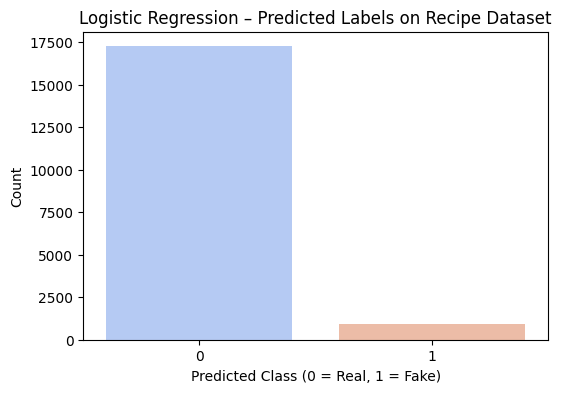

Prediction counts:
pred_lr
0    17264
1      900
Name: count, dtype: int64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='pred_lr', data=recipe_df, palette='coolwarm')
plt.title('Logistic Regression – Predicted Labels on Recipe Dataset')
plt.xlabel('Predicted Class (0 = Real, 1 = Fake)')
plt.ylabel('Count')
plt.show()

print("Prediction counts:")
print(recipe_df['pred_lr'].value_counts())


In [54]:
recipe_df['agreement'] = (
    (recipe_df['pred_lr'] == recipe_df['pred_nb']) &
    (recipe_df['pred_nb'] == recipe_df['pred_svm'])
)

agreement_rate = recipe_df['agreement'].mean()
print(f"🧮 Models agree on {agreement_rate*100:.2f}% of recipe reviews.")


🧮 Models agree on 91.66% of recipe reviews.


In [55]:
import pandas as pd

df_fake = pd.read_csv('/content/drive/MyDrive/fake-reviews-dataset/fake-reviews-dataset/fake reviews dataset.csv')
df_recipe = pd.read_csv('/content/drive/MyDrive/recipe-reviews-and-user-feedback-dataset/recipe-reviews-and-user-feedback-dataset/Recipe Reviews and User Feedback Dataset.csv')

print("Fake reviews:", df_fake.shape)
print("Recipe reviews:", df_recipe.shape)


Fake reviews: (40432, 4)
Recipe reviews: (18182, 15)


In [56]:
df_fake.columns


Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [57]:
# Select relevant text columns
fake_texts = df_fake['text_']     # fake reviews text column
recipe_texts = df_recipe['text']  # recipe reviews text column


In [58]:
import re

def clean_text(text):
    text = str(text).lower()                   # lowercase
    text = re.sub(r'[^a-z\s]', '', text)       # keep only letters & spaces
    return text.strip()

fake_texts = fake_texts.apply(clean_text)
recipe_texts = recipe_texts.apply(clean_text)


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_fake = vectorizer.fit_transform(fake_texts)
X_recipe = vectorizer.transform(recipe_texts)

print("Fake TF-IDF shape:", X_fake.shape)
print("Recipe TF-IDF shape:", X_recipe.shape)


Fake TF-IDF shape: (40432, 5000)
Recipe TF-IDF shape: (18182, 5000)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity_matrix = cosine_similarity(X_recipe, X_fake)
print("Similarity matrix shape:", similarity_matrix.shape)


In [12]:
most_similar_idx = np.argmax(similarity_matrix, axis=1)
max_similarity = np.max(similarity_matrix, axis=1)

combined_df = pd.DataFrame({
    'recipe_review': recipe_texts,
    'most_similar_fake_review': fake_texts.iloc[most_similar_idx].values,
    'cosine_similarity': max_similarity
})

combined_df.head(50)


,recipe_review,most_similar_fake_review,cosine_similarity
0,i tweaked it a little removed onions because o...,i love these lutron dimmers i have them all o...,0.330566
1,bush used to have a white chili bean and it ma...,super cute great price have it in the blue an...,0.294669
2,i have a very complicated white chicken chili ...,i found immediately a recipe that will make yo...,0.486143
3,in your introduction you mentioned cream chees...,this cheese slicer is so easy to use and very ...,0.376277
4,wonderful i made this for a chilistew night di...,this is a great recipe book full of delicious ...,0.330332
5,amazing my boyfriend loved it so much going to...,these are really cool actually my boyfriend l...,0.471304
6,wow this recipe is excellent as written the ...,this works really well can change between gram...,0.338235
7,this is delicious and i make it often one such...,totally cute its the perfect size for my morni...,0.236347
8,i absolutely love this recipe ive tweaked it q...,i found immediately a recipe that will make yo...,0.419166
9,i make this a lot my kids and there friends c...,our friends had an up weekend it was a good ti...,0.432898


In [13]:
max_similarity = np.max(similarity_matrix, axis=1)


In [14]:
print("Total recipe reviews:", len(max_similarity))
print("Average similarity:", max_similarity.mean())
print("Median similarity:", np.median(max_similarity))
print("Highest similarity:", max_similarity.max())
print("Lowest similarity:", max_similarity.min())


Total recipe reviews: 18182
Average similarity: 0.4253610610472015
Median similarity: 0.4030626908483193
Highest similarity: 1.0000000000000002
Lowest similarity: 0.0


In [15]:
high = np.sum(max_similarity > 0.7)
moderate = np.sum((max_similarity > 0.4) & (max_similarity <= 0.7))
low = np.sum(max_similarity <= 0.4)

print(f"Highly similar:  {high} ({high/len(max_similarity)*100:.2f}%)")
print(f"Moderately similar: {moderate} ({moderate/len(max_similarity)*100:.2f}%)")
print(f"Low similarity:   {low} ({low/len(max_similarity)*100:.2f}%)")


Highly similar:  688 (3.78%)
Moderately similar: 8611 (47.36%)
Low similarity:   8883 (48.86%)


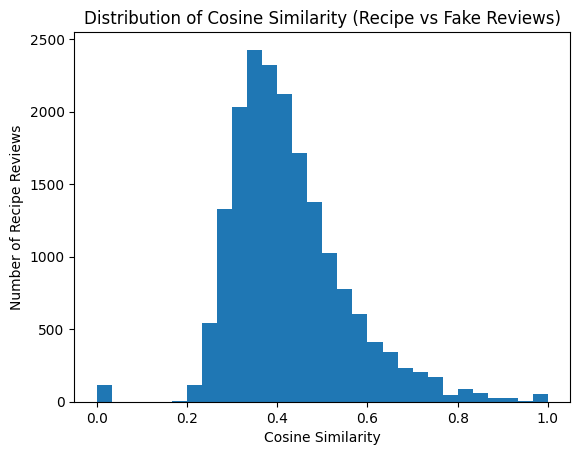

In [15]:
import matplotlib.pyplot as plt

plt.hist(max_similarity, bins=30)
plt.title("Distribution of Cosine Similarity (Recipe vs Fake Reviews)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Recipe Reviews")
plt.show()


In [16]:
combined_df.to_csv('/content/drive/MyDrive/recipe_fake_cosine_similarity.csv', index=False)
print("✅ Combined dataset saved successfully!")


✅ Combined dataset saved successfully!


In [17]:
from google.colab import drive
drive.mount('/content/drive')
# Optional – if you want to save models or results to Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!pip install opendatasets


In [18]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products'
target_path = '/content/drive/MyDrive/consumer-reviews-of-amazon-products'

od.download(dataset_url, data_dir=target_path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sardarsab
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products


100%|██████████| 16.3M/16.3M [00:00<00:00, 218MB/s]

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

amazon_path = '/content/drive/MyDrive/consumer-reviews-of-amazon-products/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'

df_amazon = pd.read_csv(amazon_path)
print(df_amazon.shape)
df_amazon.head()


(5000, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [7]:
df_amazon.columns


Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [8]:
import re
import pandas as pd

# Drop missing review text
df_amazon = df_amazon.dropna(subset=['reviews.text']).copy()

# Define cleaning function (same as before)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)        # remove special chars/numbers
    text = re.sub(r"\s+", " ", text).strip()    # remove extra spaces
    return text

# Apply cleaning
df_amazon['cleaned_text'] = df_amazon['reviews.text'].apply(clean_text)

print("✅ After cleaning:", df_amazon.shape)
df_amazon[['reviews.text', 'cleaned_text']].head()


✅ After cleaning: (5000, 25)


,reviews.text,cleaned_text
0,I thought it would be as big as small paper bu...,i thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...,this kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...,didnt know how much id use a kindle so went fo...
3,I am 100 happy with my purchase. I caught it o...,i am happy with my purchase i caught it on sal...
4,Solid entry level Kindle. Great for kids. Gift...,solid entry level kindle great for kids gifted...


In [9]:
# Transform using the same TF-IDF vectorizer used on fake reviews
amazon_tfidf = vectorizer.transform(df_amazon['cleaned_text'])
print("TF-IDF shape:", amazon_tfidf.shape)


TF-IDF shape: (5000, 10000)


In [10]:
import joblib

vectorizer = joblib.load('/content/drive/MyDrive/fake_review_models/tfidf_vectorizer.pkl')
model_lr = joblib.load('/content/drive/MyDrive/fake_review_models/model_logistic.pkl')
model_nb = joblib.load('/content/drive/MyDrive/fake_review_models/model_nb.pkl')
model_svm = joblib.load('/content/drive/MyDrive/fake_review_models/model_svm.pkl')

print("✅ All models and vectorizer loaded successfully!")


✅ All models and vectorizer loaded successfully!


In [11]:
# Logistic Regression predictions
amazon_preds_lr = model_lr.predict(amazon_tfidf)

# Show distribution
import numpy as np
unique, counts = np.unique(amazon_preds_lr, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(4207), np.int64(1): np.int64(793)}


In [13]:
# Naive Bayes
amazon_preds_nb = model_nb.predict(amazon_tfidf)

# SVM
amazon_preds_svm = model_svm.predict(amazon_tfidf)


In [14]:
import numpy as np

# Logistic Regression
unique_lr, counts_lr = np.unique(amazon_preds_lr, return_counts=True)
# Naive Bayes
unique_nb, counts_nb = np.unique(amazon_preds_nb, return_counts=True)
# SVM
unique_svm, counts_svm = np.unique(amazon_preds_svm, return_counts=True)

print("Logistic Regression:", dict(zip(unique_lr, counts_lr)))
print("Naive Bayes:", dict(zip(unique_nb, counts_nb)))
print("SVM:", dict(zip(unique_svm, counts_svm)))


Logistic Regression: {np.int64(0): np.int64(4207), np.int64(1): np.int64(793)}
Naive Bayes: {np.int64(0): np.int64(4065), np.int64(1): np.int64(935)}
SVM: {np.int64(0): np.int64(4224), np.int64(1): np.int64(776)}


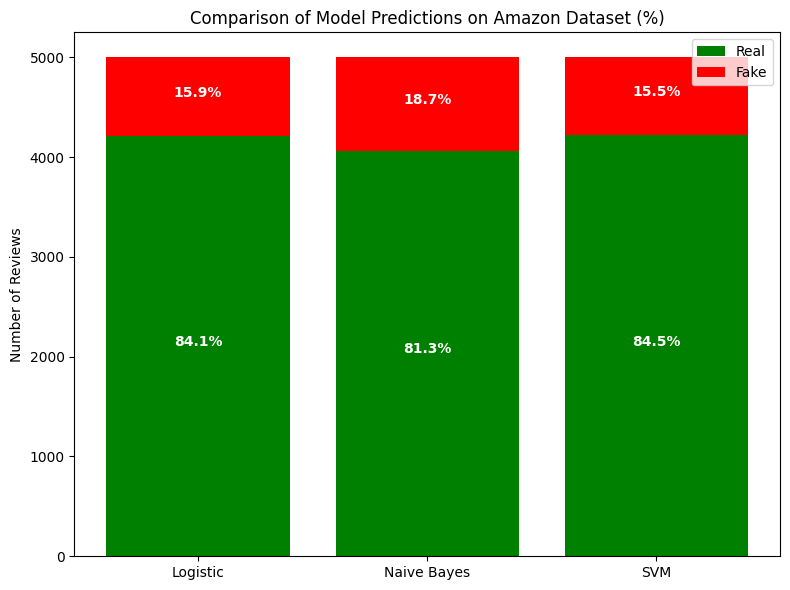

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Models and counts
models = ['Logistic', 'Naive Bayes', 'SVM']
fake_counts = [counts_lr[1], counts_nb[1], counts_svm[1]]
real_counts = [counts_lr[0], counts_nb[0], counts_svm[0]]

x = np.arange(len(models))

# Total reviews for each model
totals = [real_counts[i] + fake_counts[i] for i in range(len(models))]

plt.figure(figsize=(8,6))

# Plot bars
plt.bar(x, real_counts, color='green', label='Real')
plt.bar(x, fake_counts, bottom=real_counts, color='red', label='Fake')

# Add percentage labels
for i in range(len(models)):
    real_pct = (real_counts[i] / totals[i]) * 100
    fake_pct = (fake_counts[i] / totals[i]) * 100

    # Real percentage (middle of green section)
    plt.text(x[i], real_counts[i] / 2, f'{real_pct:.1f}%', ha='center', color='white', fontweight='bold')

    # Fake percentage (middle of red section)
    plt.text(x[i], real_counts[i] + fake_counts[i]/2, f'{fake_pct:.1f}%', ha='center', color='white', fontweight='bold')

# Aesthetics
plt.xticks(x, models)
plt.ylabel('Number of Reviews')
plt.title('Comparison of Model Predictions on Amazon Dataset (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
df_amazon['pred_logistic'] = amazon_preds_lr
df_amazon['pred_nb'] = amazon_preds_nb
df_amazon['pred_svm'] = amazon_preds_svm

df_amazon.to_csv('/content/drive/MyDrive/amazon_predictions_all_models.csv', index=False)
print("✅ All predictions saved to Drive!")


✅ All predictions saved to Drive!
